# Prompting Techniques Demo

This notebook demonstrates various prompting techniques in action using the Hugging Face Inference API (no local model weights required). You'll need to set your Hugging Face API token in the `HF_TOKEN` environment variable.

## 1. Setup
Install and import necessary libraries, then initialize the Inference API client.

In [ ]:
!pip install huggingface-hub

## Get your HuggingFace Token
For the next part, you need to create a hugging face account. In your profile, you need to create a free token to use.

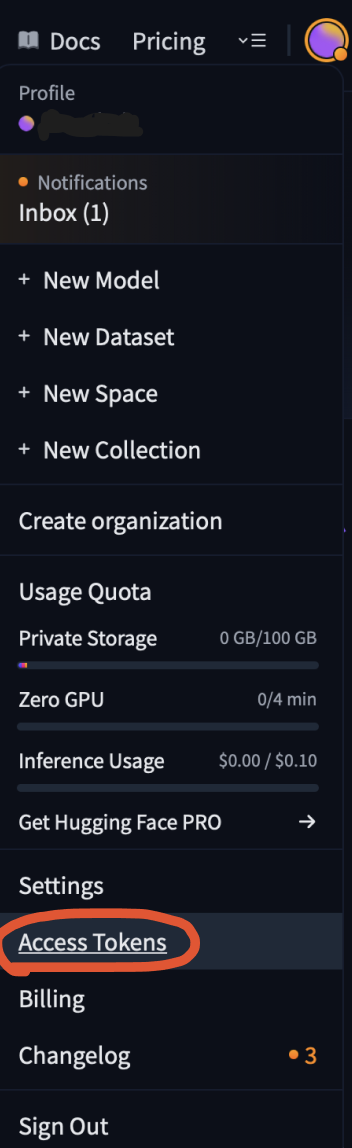

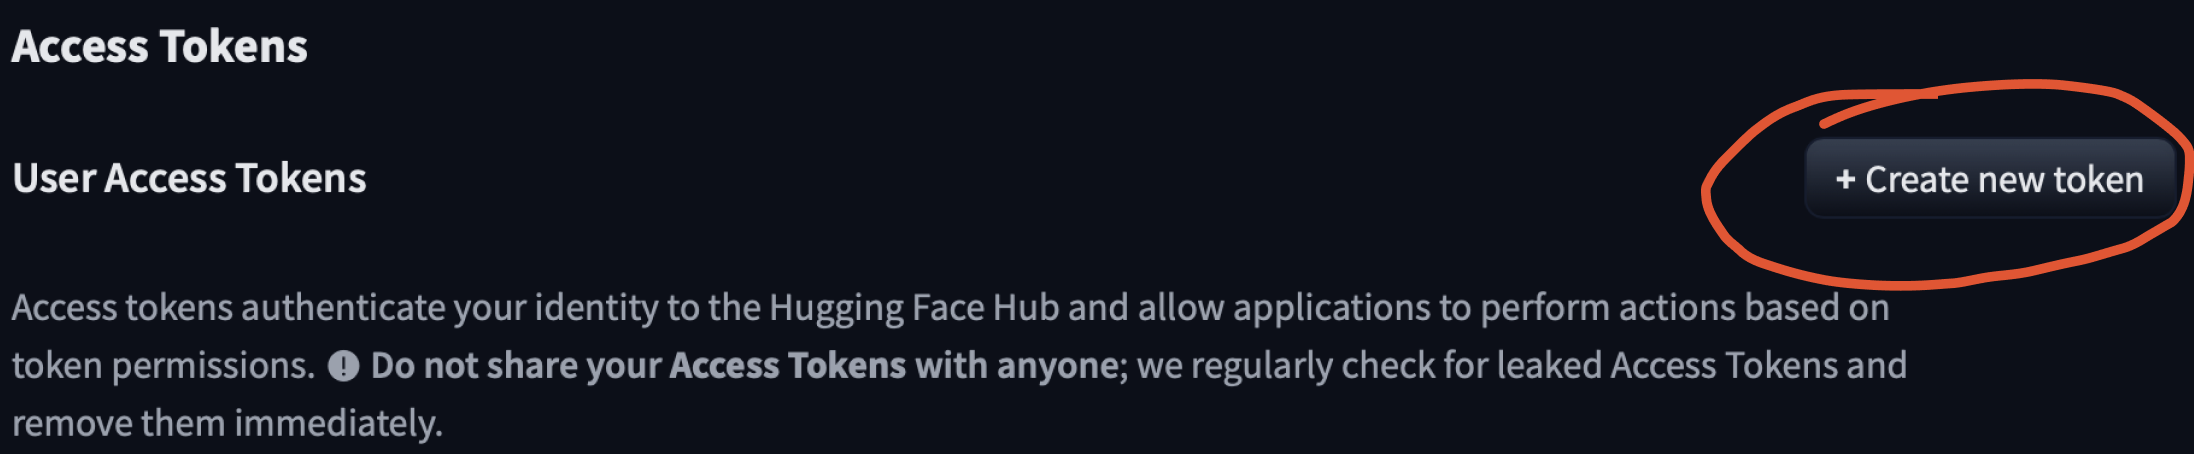

Select the permissions below.

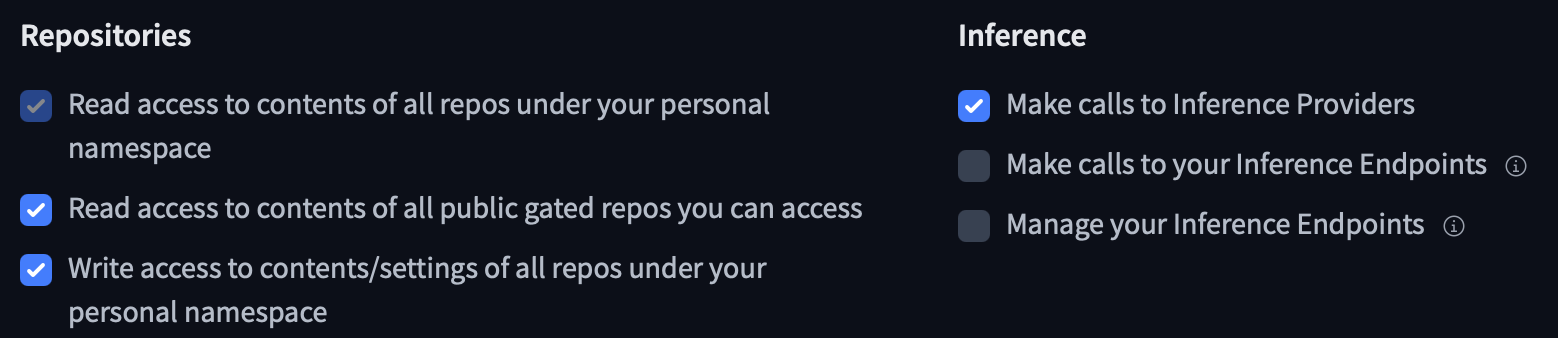

Add this token to the 'secrets' tab in your colab under the name 'HF_TOKEN'. This will set your token as an environment variable in that name. 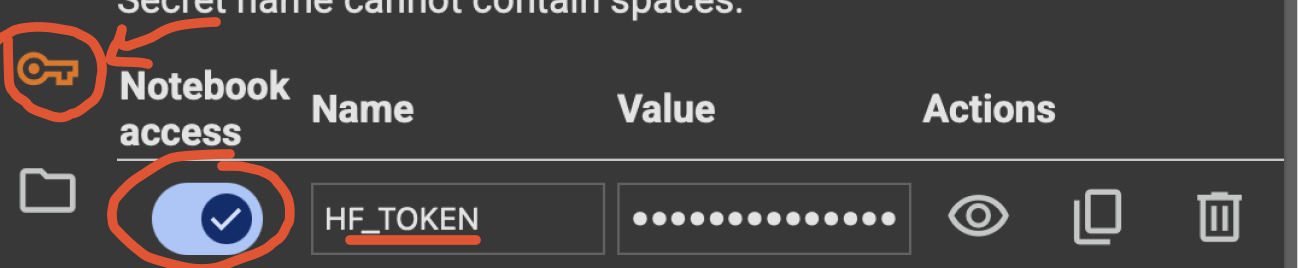

In [1]:
import os
from huggingface_hub import InferenceClient
from google.colab import userdata

# Get your HF token from an environment variable
hf_token = userdata.get('HF_TOKEN')  # set this beforehand!
model_id = 'deepseek-ai/DeepSeek-V3-0324'  # or any hosted open-source model

# Initialize remote inference client
client = InferenceClient(token=hf_token)

def generate(prompt: str) -> str:
    completion = client.chat.completions.create( # create a simple chat completion (predict the next token) function
        model=model_id,
        messages=[{'role': 'user', 'content': prompt}], # format the messages in the form that the model expects
    )
    return completion.choices[0].message.content

## 2. Zero-shot Prompting
Ask the model directly, without examples:

In [ ]:
prompt_zero_shot = "Translate the following sentence to French: 'I love learning about AI.'"
print("Prompt:", prompt_zero_shot)
print("Response:", generate(prompt_zero_shot))

Prompt: Translate the following sentence to French: 'I love learning about AI.'
Response: The translation of "I love learning about AI." in French is:  

**"J'adore apprendre sur l'IA."**  

*(IA = Intelligence Artificielle)*  

Let me know if you'd like any variations or a different phrasing! 😊


## 3. Few-shot Prompting
Provide a few examples before the task:

In [ ]:
prompt_few_shot = (
    "Q: What is the capital of France?\n"
    "A: Paris\n"
    "Q: What is the capital of Japan?\n"
    "A: Tokyo\n"
    "Q: What is the capital of Australia?\n"
    "A: "
)
print("Prompt:\n", prompt_few_shot)
print("Response:", generate(prompt_few_shot))

Prompt:
 Q: What is the capital of France?
A: Paris
Q: What is the capital of Japan?
A: Tokyo
Q: What is the capital of Australia?
A: 
Response: The capital of Australia is Canberra.


Notice here that even though the instructions are simple and the model is powerful, it still did not follow the instructions exactly. The final response should have been 'Canberra'

## 4. Chain-of-Thought Prompting
Encourage the model to show reasoning steps:

In [ ]:
prompt_cot = (
    "If there are 3 red balls and 2 blue balls in a bag, what is the probability of drawing a red ball? "
    "Let's think step by step."
)
answer = generate(prompt_cot)
print("Answer:", answer)

Answer: Let's determine the probability of drawing a red ball from the bag step by step.

### Step 1: Understand the Problem
We have a bag containing:
- Red balls: 3
- Blue balls: 2

We want to find the probability of drawing a red ball when one ball is randomly selected from the bag.

### Step 2: Determine the Total Number of Balls
First, we need to find the total number of balls in the bag.

- Number of red balls = 3
- Number of blue balls = 2

Total number of balls = Number of red balls + Number of blue balls  
Total number of balls = 3 + 2 = 5

### Step 3: Determine the Number of Favorable Outcomes
The favorable outcome is drawing a red ball. The number of red balls is 3.

Number of favorable outcomes (red balls) = 3

### Step 4: Calculate the Probability
Probability is calculated as:

\[ \text{Probability} = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}} \]

Plugging in the numbers:

\[ \text{Probability of drawing a red ball} = \frac{3}{5} \]

## 5. Prompt Chaining
Break a complex task into multiple model calls:

In [ ]:
text = (
    "Artificial intelligence (AI) is the simulation of human intelligence processes by machines, "
    "especially computer systems. These processes include learning, reasoning, and self-correction."
)
summary = generate(f"Summarize this text: {text}")
print("Summary:", summary)
questions = generate(f"Generate three questions about the following summary: {summary}")
print("Questions:\n", questions)

Summary: **Summary:**  
Artificial intelligence (AI) refers to machines, particularly computer systems, mimicking human intelligence processes such as learning, reasoning, and self-improvement.
Questions:
 Here are three questions about the provided summary:  

1. **What are the key human intelligence processes that artificial intelligence (AI) aims to mimic?**  
2. **How do computer systems in AI demonstrate capabilities like learning and reasoning?**  
3. **What does "self-improvement" mean in the context of artificial intelligence?**  

Would you like any modifications or additional questions?


## 6. Directional Stimulus Prompting
Nudge the model with a role or style:

In [ ]:
prompt_directional = (
    "You are an enthusiastic language tutor. Explain the subjunctive mood in Spanish to a beginner."
)
print(generate(prompt_directional))

¡Hola, estudiante entusiasta! 👋 I’m so excited to explain the *subjunctive mood* (*el subjuntivo*) to you in a simple way.  

### 🌟 **What Is the Subjunctive?**
The subjunctive is not a tense (like past or future), but a *mood*—a way to express uncertainty, doubt, desires, hopes, or hypothetical situations. While the *indicative* (what you’ve learned so far) states facts (*"Yo hablo español"*), the subjunctive expresses *non-facts*, like:  

- Wishes (*"Quiero que tú **hables** español."*)  
- Emotions (*"Me alegra que **estés** aquí."*)  
- Doubt (*"Dudo que **venga** mañana."*)  
- Recommendations (*"Es importante que **estudies**."*)  

### 🔑 **When Do We Use It?**  
The subjunctive often appears after:  
1. **WEIRDO expressions**:  
   - **W**ishes (*querer, desear, esperar*)  
   - **E**motions (*alegrarse, temer, sorprender*)  
   - **I**mpersonal expressions (*Es bueno que…, Es necesario que…*)  
   - **R**ecommendations (*sugerir, recomendar, aconsejar*)  
   - **D**oubt (*duda

## 7. Tree-of-Thought Prompting
Ask the model to explore multiple ideas:

In [ ]:
prompt_tree = (
    "What are two possible strategies to reduce daily carbon footprint? "
    "List each with pros and cons."
)
print(generate(prompt_tree))

Here are two effective strategies to reduce your daily carbon footprint, along with their pros and cons:  

### **1. Using Public Transportation or Cycling Instead of Driving**  
**Pros:**  
- **Lower Emissions:** Public transport and cycling produce far fewer greenhouse gases per passenger than private vehicles.  
- **Cost Savings:** Saves money on fuel, parking, and vehicle maintenance.  
- **Health Benefits:** Cycling or walking improves fitness and reduces air pollution exposure.  

**Cons:**  
- **Less Convenience:** May take longer or be less flexible than driving.  
- **Limited Availability:** In some areas, public transport is unreliable or cycling infrastructure is poor.  
- **Weather Dependency:** Cycling or waiting for buses may be uncomfortable in extreme weather.  

### **2. Eating Less Meat (Especially Beef) and Dairy**  
**Pros:**  
- **Lower Emissions:** Livestock farming (particularly beef) is a major source of methane and deforestation.  
- **Healthier Diet:** Plant-b

## 8. Self-Consistency Prompting
Run the same question multiple times and pick the most common answer:

In [ ]:
import collections
query = "If you have 5 apples and eat 2, how many are left? Let's think step by step."
answers = [generate(query) for _ in range(5)]
count = collections.Counter(answers)
print("Answers and counts:\n", count)
print("Most common answer:\n", count.most_common(1)[0])

Answers and counts:
 Counter({"Certainly! Let's solve the problem step by step.\n\n**Problem:**  \nIf you have 5 apples and eat 2, how many are left?\n\n**Solution:**\n\n1. **Initial Number of Apples:**  \n   You start with **5 apples**.\n\n   \\[\n   5\n   \\]\n\n2. **Apples Eaten:**  \n   You eat **2 apples**.\n\n3. **Apples Remaining:**  \n   Subtract the number of apples eaten from the initial number to find out how many are left.\n\n   \\[\n   5 - 2 = 3\n   \\]\n\n4. **Final Answer:**  \n   There are **3 apples** left.\n\n\\[\n\\boxed{3}\n\\]": 1, "Let's break this down step by step:\n\n1. **Initial number of apples**: You start with 5 apples.\n   \n2. **Apples eaten**: You eat 2 apples.\n\n3. **Apples remaining**: Subtract the number of apples eaten from the initial number of apples.\n   \n   \\[\n   5 \\text{ apples} - 2 \\text{ apples} = 3 \\text{ apples}\n   \\]\n\n**Final Answer**: \\(\\boxed{3}\\) apples are left.": 1, "Certainly! Let's break this down step by step.\n\n**Ste

## Bonus: Conversation with History
Maintain and pass a conversation history to the model:

In [ ]:
# Initialize conversation history with a system message and a user message
history = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "I want you to help me learn french. My name is Daisy. Translate everything you say since I am a complete beginner."}
]

# Function to build the prompt string from the conversation history
def build_prompt(history):
    s = "" # Initialize an empty string to build the prompt
    # Iterate through each message in the history
    for msg in history:
        # Determine the tag based on the message's role
        tag = "[System]" if msg["role"] == "system" else ("[User]" if msg["role"] == "user" else "[Assistant]")
        # Append the tagged message content to the prompt string
        s += f"{tag}: {msg['content']}\n"
    # Add the assistant tag at the end to prompt the model for its response
    s += "[Assistant]: "
    return s # Return the constructed prompt string

# Build the initial prompt using the current history
prompt = build_prompt(history)
# Generate a reply from the model using the prompt
reply = generate(prompt)
# Append the model's reply to the conversation history
history.append({"role": "assistant", "content": reply})
print(reply)

Bien sûr, Daisy ! Je serai ravi de t'aider à apprendre le français. Je vais tout traduire pour toi puisque tu es débutante.  
/  
Of course, Daisy! I’ll be happy to help you learn French. I’ll translate everything for you since you're a beginner.  

Par exemple :  
- **Français** : "Comment ça va aujourd’hui ?"  
- **English** : "How are you today?"  

Dis-moi par quoi tu veux commencer : les bases (salutations, chiffres) ou quelque chose de spécifique ?  
/  
Tell me what you’d like to start with: basics (greetings, numbers) or something specific?


In [ ]:
# Add a new user message to the conversation history
history.append({"role": "user", "content": "Hello. What is my name?"})
# Build a new prompt including the updated history
prompt = build_prompt(history)
# Generate a reply from the model using the updated prompt
reply = generate(prompt)
# Append the model's second reply to the conversation history
history.append({"role": "assistant", "content": reply})
print(reply)

**In English:**  
Your name is Daisy! 🌼 *(You told me earlier: "My name is Daisy.")*  

**En français :**  
Tu t’appelles Daisy !  
→ *"Je m’appelle Daisy"* = *"My name is Daisy"* (Phrase utile pour se présenter !)  

Veux-tu pratiquer d’autres phrases de base en français ? 😊  

*(Example: "Comment tu t’appelles ?" = "What’s your name?")*
